# Part 8 - Project Extension | Crop Data Forecasting

In this assignment you are to plan an extension to the analysis that you performed in Course Project - Part 1. The overall result of your extension plan is to help inform the city council, city manager/mayor, and city residents about the potential future impacts of smoke on their community. In Course Project - Part 1 you should have developed an initial prediction model for smoke. You should take that model and modify it to estimate a specific social or economic impact on the city.

For this part we have the data for both agriculture and the wildfire attributes for the city of Bismarck, North Dakota. Now, we will find a way to connect the two with a relationship that shows there is an impact of wildfire on the agricutural yield or produce. We will be going through a process of cleaning and subsetting data or pre-processing it to make it suitable for analysis.

Thus this notebook will contain the implementation of the following steps:

1. Preprocessing the raw data that has been collected for the agriculture in North Dakota.
2. After obtaining the final attributes for agriculture, we will use our final wildfire data to establish a relationship
3. We will use statistical methodologies to compare the relationship and prove it's significance

### Agriculture as an Economic Focus for North Dakota:

Agriculture is one of the main revenue generating industry in the state of North Dakota. Wildfire and Agriculture have direct impact on each other and agriculture is also directly responsible for the cash reciepts and the economic health of the state. Hence, by the transitive property we can claim that wildfire's effect on agriculture bears a weight on the econmony of the state.

The reason we are focusing more on Oats than any other crop is because it is concentrated and grown around the belt of the region where Bismarck lies. Hence there is a direct impact of oat on the economy of the city.

### Significance of Yield as an Economic Indicator:

- **Wealth Generation:** Higher yield signifies increased agricultural output, contributing significantly to a state's economic wealth through enhanced revenue from crop sales.

- **Cash Receipts and Income:** Improved yield translates to higher cash receipts from agricultural products, directly impacting the income of farmers and stakeholders.

- **Employment and Economic Activity:** Robust agricultural yield creates job opportunities and stimulates economic activities in related industries, bolstering the state's economy.

- **Market Competitiveness:** States with higher yield often have a competitive edge in regional or global markets, attracting investments and boosting trade activities.

- **Food Security and Stability:** Adequate yield ensures food security, stabilizes prices, and reduces dependence on external food sources, fostering economic stability.



## Setup
We first set the working dependencies and constants that are required to process.

The setup contains the following steps

Import all relevant packages
Define all the relevant constants that will be used throughout the script.

In [1]:
# import the packages
# Import the pandas library and alias it as pd
import pandas as pd

# Import the numpy library and alias it as np
import numpy as np

# Import the warnings library 
import warnings

# Ignore warnings for this demonstration
warnings.filterwarnings("ignore")

# Import the product library from itertools
from itertools import product

# import visualization tools
import seaborn as sns
import matplotlib.pyplot as plt

# import Linear Regression tool
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt


### Purpose:
The code aims to perform time series analysis using VARMAX modeling, forecast future values, append forecasts to existing data, and visualize the relationship between 'YIELD' and 'smoke_estimate' variables over time.

### Steps:
1. **Data Loading and Setup:**
   - Loads multivariate time series data from a CSV file.
   - Retrieves the columns and sets the 'YEAR' column as the index.

2. **Preparing Endogenous Variables:**
   - Selects columns related to dependent and independent variables for modeling.
   - Constructs an endogenous variable set ('endog') from the data.

3. **VARMAX Model Fitting:**
   - Fits a VARMAX model to the endogenous variables with a specified order (adjustable).

4. **Forecasting Future Values:**
   - Specifies the number of future periods ('n_periods') for forecasting.
   - Generates forecasts using the fitted VARMAX model.

5. **Appending Forecasted Data:**
   - Concatenates the forecasted data with the original multivariate data.
   - Fills missing values in the 'COMMODITY_DESC' column and saves the appended data as 'predicted_data.csv'.

6. **Data Visualization:**
   - Creates a sample DataFrame (in the commented section) for plotting purposes.
   - Plots a combo chart (line chart) showcasing 'YIELD' and 'smoke_estimate' over years.

### Technical Details:
- The code utilizes VARMAX modeling from the statsmodels library for multivariate time series forecasting.
- Forecasting involves specifying the number of future periods and generating predictions using the VARMAX model.
- Data visualization is achieved using Matplotlib to plot a combo chart displaying the trends of 'YIELD' and 'smoke_estimate' variables over time.

This sequence combines statistical modeling, forecasting, data visualization, and data manipulation to analyze and visualize the relationship between key variables in a time series context.


In [2]:
# Load multivariate time series data, setting 'YEAR' as index
multivariate_data = pd.read_csv(r"C:\Users\shwet\Documents\local-wildfire-project\Data512-WildFire-Project\02_data\02_intermediate_data\multivariate_data.csv", parse_dates=['YEAR'], index_col='YEAR')

# Extract columns from the loaded data
multivariate_data.columns

Index(['COMMODITY_DESC', 'AREA HARVESTED', 'AREA PLANTED', 'smoke_estimate',
       'num_fires', 'PRODUCTION', 'YIELD'],
      dtype='object')

In [3]:
# Select relevant columns for modeling
endog = multivariate_data[['PRODUCTION', 'YIELD', 'AREA HARVESTED', 'AREA PLANTED','smoke_estimate', 'num_fires']]

In [4]:
# Fit a VARMAX model to the selected variables
model = sm.tsa.VARMAX(endog, order=(1, 1))  # Order can be adjusted
varmax_model = model.fit()

C:\Users\shwet\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\shwet\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\shwet\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [5]:
# Forecast future values for 'n_periods' periods
n_periods = 15  # Number of periods to forecast
forecast = varmax_model.forecast(steps=n_periods, exog_future=None)  # Exogenous variables can be added if available

In [6]:
# Display forecasted values for dependent and independent variables
print("Forecasted values for the variables:")
print(forecast)

Forecasted values for the variables:
              PRODUCTION      YIELD  AREA HARVESTED  AREA PLANTED  \
2021-01-01  1.214873e+06  53.250199    23484.301362  32991.646628   
2022-01-01  8.759405e+05  46.899826    20487.642020  32163.927724   
2023-01-01  8.698433e+05  46.241929    20207.180689  31659.712581   
2024-01-01  8.639244e+05  45.847289    20152.628330  31533.739462   
2025-01-01  8.698256e+05  45.572191    20310.595727  31614.516778   
2026-01-01  8.793050e+05  45.314044    20560.911018  31809.539252   
2027-01-01  8.909016e+05  45.072122    20863.539209  32071.130011   
2028-01-01  9.035324e+05  44.846211    21191.814545  32368.704037   
2029-01-01  9.165158e+05  44.636258    21528.411231  32681.949487   
2030-01-01  9.294025e+05  44.441779    21861.980084  32997.453908   
2031-01-01  9.419068e+05  44.262073    22185.310913  33306.556072   
2032-01-01  9.538546e+05  44.096319    22494.029055  33603.858083   
2033-01-01  9.651481e+05  43.943644    22785.689785  33886.190094 

In [7]:
# Concatenate forecasted data with the original multivariate data
df_appended = pd.concat([multivariate_data, forecast]).reset_index()

In [19]:
# Fill missing values in the 'COMMODITY_DESC' column and save as 'predicted_data.csv'
df_appended['COMMODITY_DESC'] = df_appended['COMMODITY_DESC'].fillna('OATS')
df_appended.to_csv(r "C:\Users\shwet\Documents\local-wildfire-project\Data512-WildFire-Project\02_data\03_final_data\predicted_data.csv")

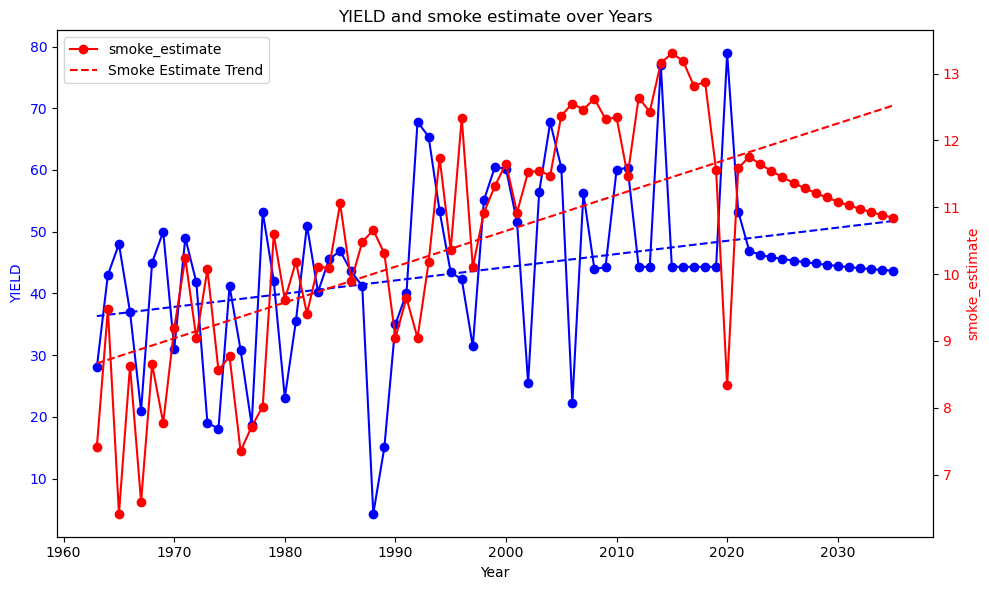

In [9]:
from sklearn.linear_model import LinearRegression

# Convert datetime index to numeric representation
df_appended['numeric_index'] = df_appended['index'].astype('int64') 


plt.figure(figsize=(10, 6))  # Set the figure size

# Plot 'YIELD' on the primary y-axis (left)
plt.plot(df_appended['index'], df_appended['YIELD'], marker='o', color='blue', label='YIELD')
plt.xlabel('Year')
plt.ylabel('YIELD', color='blue')  # Set label for the left y-axis
plt.tick_params(axis='y', labelcolor='blue')  # Set color for left y-axis labels

# Perform linear regression on numeric index for 'YIELD'
reg_y = LinearRegression().fit(df_appended['numeric_index'].values.reshape(-1, 1), df_appended['YIELD'])
plt.plot(df_appended['index'], reg_y.predict(df_appended['numeric_index'].values.reshape(-1, 1)), color='blue', linestyle='--', label='YIELD Trend')

# Create a secondary y-axis (right) for 'smoke_estimate'
ax2 = plt.twinx()
ax2.plot(df_appended['index'], df_appended['smoke_estimate'], marker='o', color='red', label='smoke_estimate')
ax2.set_ylabel('smoke_estimate', color='red')  # Set label for the right y-axis
ax2.tick_params(axis='y', labelcolor='red')  # Set color for right y-axis labels

# Perform linear regression on numeric index for 'smoke_estimate'
reg_smoke = LinearRegression().fit(df_appended['numeric_index'].values.reshape(-1, 1), df_appended['smoke_estimate'])
ax2.plot(df_appended['index'], reg_smoke.predict(df_appended['numeric_index'].values.reshape(-1, 1)), color='red', linestyle='--', label='Smoke Estimate Trend')

plt.title('YIELD and smoke estimate over Years')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


## Plotting Function Explanation

The function `plot_variable_with_trend` serves to visualize a specific variable's trend over time and compare it to the 'smoke_estimate' variable. Here's a step-by-step breakdown of its functionality:

1. **Data Preparation:** Converts the 'index' column to a numeric representation to enable plotting against time.

2. **Primary Plot - Variable Trend:** Plots the specified variable against the years on the primary y-axis (left). The variable is depicted in blue, marked with circular indicators.

3. **Trendline for Specified Variable:** Uses Linear Regression to compute the trendline for the specified variable. It's represented as a dashed blue line, aiding in visualizing the variable's trend over time.

4. **Secondary Plot - 'smoke_estimate':** Simultaneously plots the 'smoke_estimate' variable against the years on the secondary y-axis (right). Depicted in red with circular markers.

5. **Trendline for 'smoke_estimate':** Utilizes Linear Regression to compute the 'smoke_estimate' variable's trendline, presented as a dashed red line alongside the plot.

6. **Title and Legends:** Sets appropriate titles and legends for the plot, indicating the variable being plotted and the 'smoke_estimate'.

This function allows easy comparison between the specified variable's trend and the 'smoke_estimate' variable, aiding in understanding potential correlations over time.


In [10]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def plot_variable_with_trend(df, variable):
    df['numeric_index'] = df['index'].astype('int64') 

    plt.figure(figsize=(10, 6))  # Set the figure size

    # Plot variable on the primary y-axis (left)
    plt.plot(df['index'], df[variable], marker='o', color='blue', label=variable)
    plt.xlabel('Year')
    plt.ylabel(variable, color='blue')  # Set label for the left y-axis
    plt.tick_params(axis='y', labelcolor='blue')  # Set color for left y-axis labels

    # Perform linear regression on numeric index for the variable
    reg = LinearRegression().fit(df['numeric_index'].values.reshape(-1, 1), df[variable])
    plt.plot(df['index'], reg.predict(df['numeric_index'].values.reshape(-1, 1)), color='blue', linestyle='--', label=f'{variable} Trend')

    # Create a secondary y-axis (right) for 'smoke_estimate'
    ax2 = plt.twinx()
    ax2.plot(df['index'], df['smoke_estimate'], marker='o', color='red', label='smoke_estimate')
    ax2.set_ylabel('smoke_estimate', color='red')  # Set label for the right y-axis
    ax2.tick_params(axis='y', labelcolor='red')  # Set color for right y-axis labels

    # Perform linear regression on numeric index for 'smoke_estimate'
    reg_smoke = LinearRegression().fit(df['numeric_index'].values.reshape(-1, 1), df['smoke_estimate'])
    ax2.plot(df['index'], reg_smoke.predict(df['numeric_index'].values.reshape(-1, 1)), color='red', linestyle='--', label='Smoke Estimate Trend')

    plt.title(f'{variable} and smoke estimate over Years')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()


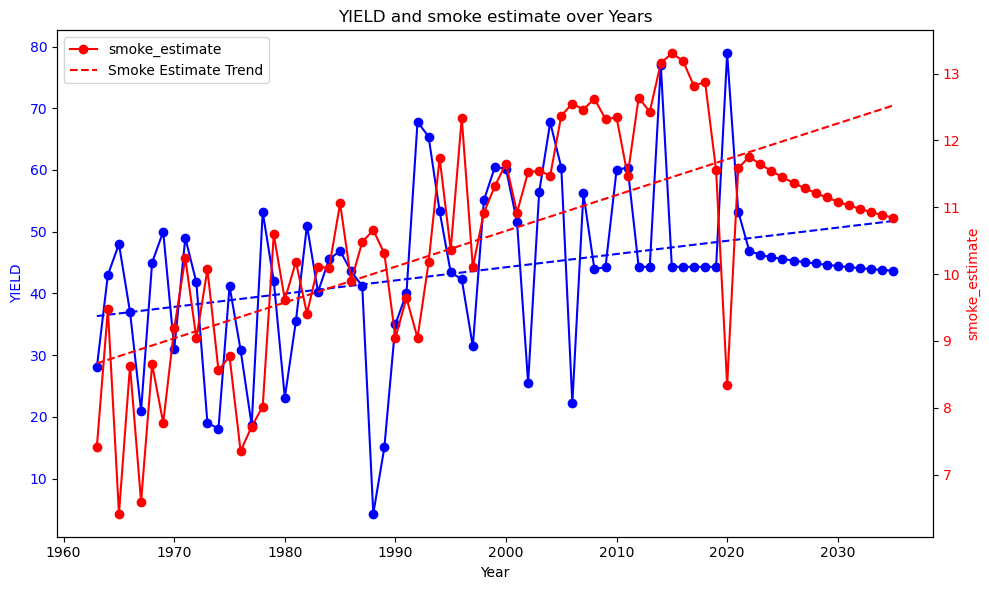

In [11]:
# plotting for 'YIELD' vs smoke estimate
plot_variable_with_trend(df_appended, 'YIELD')

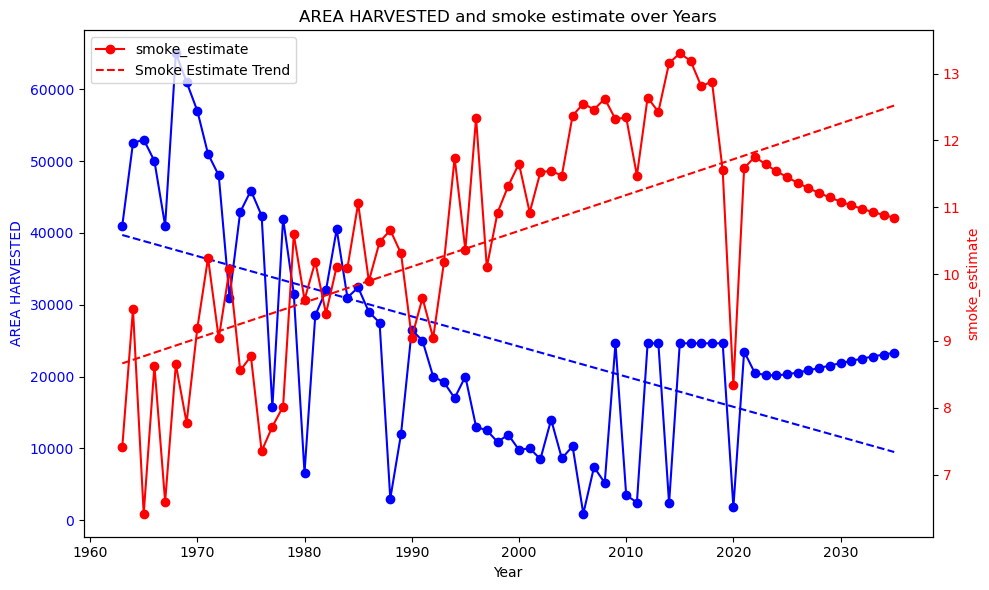

In [12]:
# plotting for 'AREA HARVESTED' vs smoke estimate
plot_variable_with_trend(df_appended, 'AREA HARVESTED')

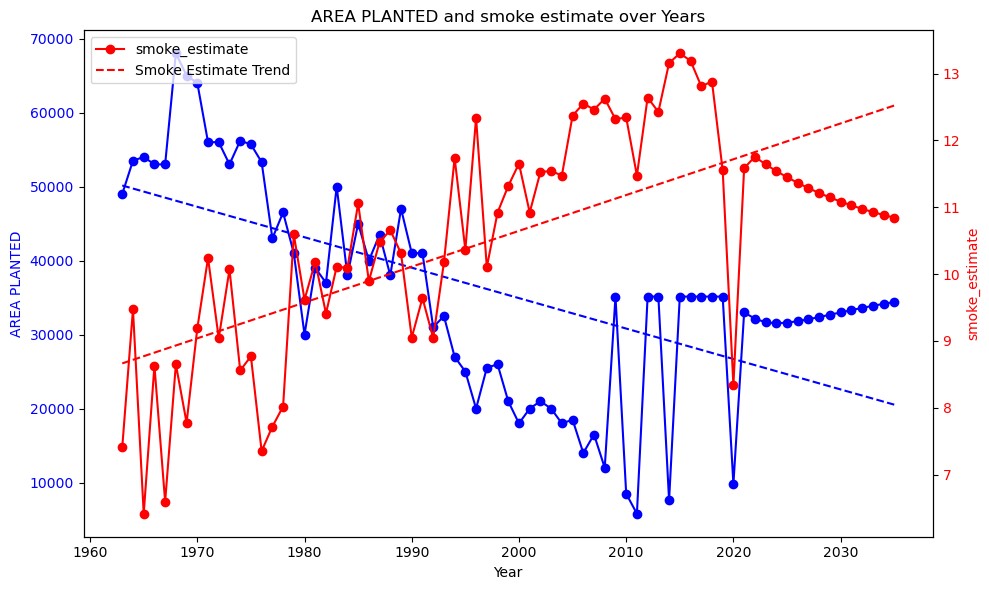

In [13]:
# plotting for 'AREA PLANTED' vs smoke estimate
plot_variable_with_trend(df_appended, 'AREA PLANTED')

# Conclusion

In the previous notebook, the focus was on proving if there was a relationship between wildfire and the agricultural impact. Using correlation and linear regression, we proved a relationship and the statistical significance of it. The question that cropped up next was: How does wildfire actually impact the agricultural yield? The time series forecasting has some answers. Although more in depth analysis is warranted for the question and the approach taken, from the plot we can come up with some possible patterns and deductions.

1. The trend for the smoke estimate is going to increase over the next few years - This finding triggers a set of insights. This could mean that the number of wildfires that happen could increase in quantity or it could also mean that the fires which occur as a function of natural process can be more damaging for the crops and agricultural yeild, i.e; the fires are going to be more intense.

2. While we see an upward projection in the wildfire impact, we see a general negative trend in the yield - There is initially some positive change observed in the yield but the general trend for a majority of time shows that there is a reduction in yield.

3. There is also a negative trend observed in the Area harvested and the area planted. We can hypothesize that the wildfire has a negative effect on the land available for cultivation.

From these observations we can infer that the wildfire not only directly impacts the yield, but also indirectly impacts it through reducing the cultivable land which leads to low yield.